In [1]:
import random
import matplotlib.pyplot as plt

random.seed()

result_ratio_arrays = []

In [2]:
def get_roll(die_size):
    if die_size<1:
        do_negative=True
        die_size=2
        roll1 = random.randint(1, 6)
        roll2 = random.randint(1,6)
        return min(roll1, roll2)
    maxRoll=0
    sixCount=0
    for i in range(die_size):
        roll = random.randint(1, 6)
        if roll > maxRoll:
            maxRoll = roll
        if roll == 6:
            sixCount=sixCount+1
    if sixCount <2:
        return maxRoll
    else:
        return 7
    


In [3]:
def get_result(roll):
    if roll < 4:
        return 0
    if roll < 6:
        return 1
    if roll < 7:
        return 2
    return 3



In [4]:
def get_results(dice_size, run_count):
    results = []
    result_counts = [0,0,0,0]
    for i in range(run_count):
        result = get_result(get_roll(dice_size))
        results.append(result)
        result_counts[result] = result_counts[result]+1
    return (results, result_counts)



In [5]:
def do_plot(size):
    results, result_counts = get_results(size, 100000)
    total_results = sum(result_counts)
    result_ratios = [0,0,0,0]
    for i in range(4):
        result_ratios[i] = (result_counts[i]*100) / total_results
    register = 0,1,2,3
    result_types = "bad_outcome", "partial success", "full success", "critical success"
    plt.figure(figsize = (8,4))
    plt.bar(register, result_ratios, width = 0.8)
    plt.title("likelyhood of outcomes with {0} dice".format(size), fontsize=16)
    plt.xticks(register, result_types)
    plt.xlabel("outcomes")
    plt.ylabel("percent chance")
    plt.ylim(0,119)
    for x, y in zip(range(4), result_ratios):
        label = "{:.0f}%".format(y)
        plt.annotate(label,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.show()
    return result_ratios;
    

In [6]:
def plot_scenario_chance(result_ratio_arrays, max_dice_size, scenario_text, result_array):
    full_success_data = []
    dice_sizes = []
    for i in range(max_dice_size):
        full_success = 0
        for j in result_array:
            full_success = full_success + result_ratio_arrays[i][j]
        full_success_data.append(full_success)
        dice_sizes.append(str(i))
    register = range(max_dice_size)
    
    plt.figure(figsize = (8,4))
    plt.bar(register, full_success_data, width = 0.8)
    plt.title("likelyhood of {0} by dice count".format(scenario_text), fontsize=16)
    plt.xticks(register, dice_sizes)
    plt.xlabel("number of dice")
    plt.ylabel("percent chance of {0}".format(scenario_text))
    plt.ylim(0,119)
    for x, y in zip(range(max_dice_size), full_success_data):
        label = "{:.0f}%".format(y)
        plt.annotate(label,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.show()
    

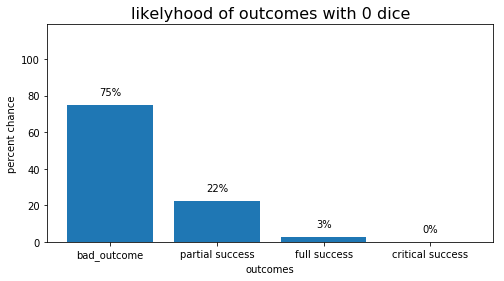

In [7]:
result_ratio_arrays.append(do_plot(0))

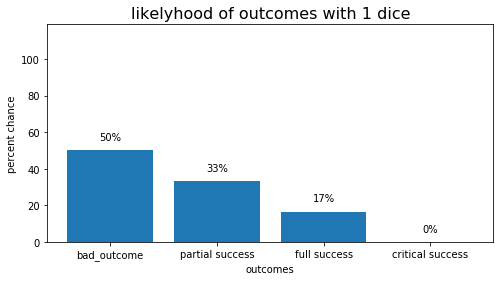

In [8]:
result_ratio_arrays.append(do_plot(1))

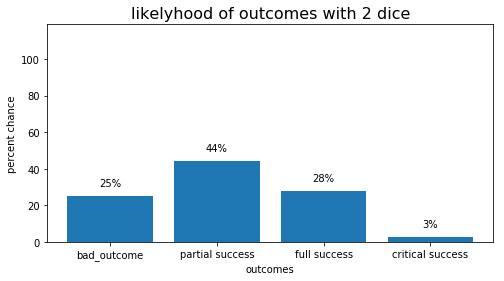

In [9]:
result_ratio_arrays.append(do_plot(2))

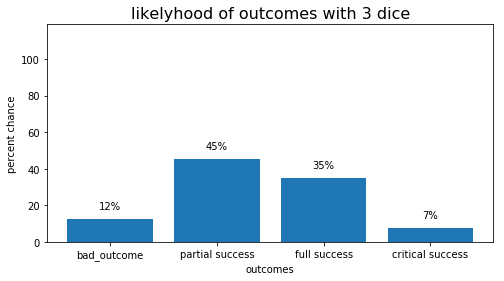

In [10]:
result_ratio_arrays.append(do_plot(3))

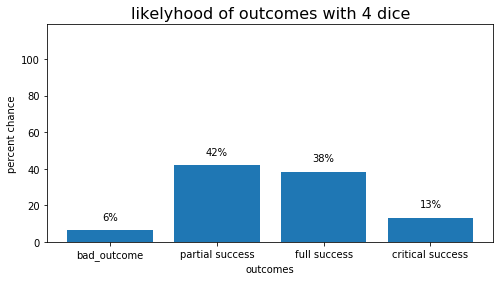

In [11]:
result_ratio_arrays.append(do_plot(4))

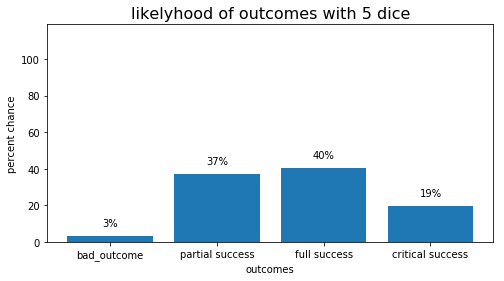

In [12]:
result_ratio_arrays.append(do_plot(5))

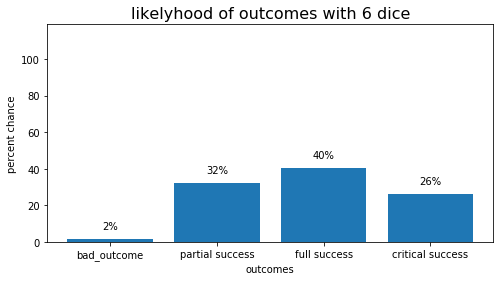

In [13]:
result_ratio_arrays.append(do_plot(6))

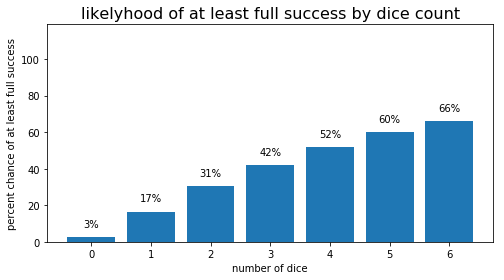

In [14]:
plot_scenario_chance(result_ratio_arrays, 7, "at least full success", [2,3])

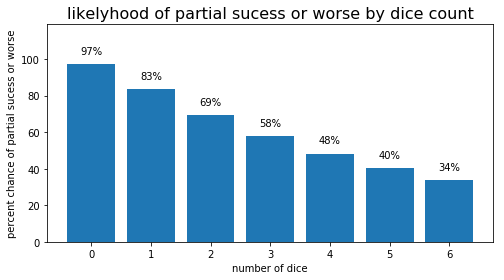

In [15]:
plot_scenario_chance(result_ratio_arrays, 7, "partial sucess or worse", [0,1])

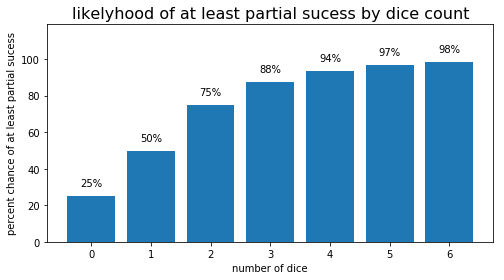

In [16]:
plot_scenario_chance(result_ratio_arrays, 7, "at least partial sucess", [1,2,3])

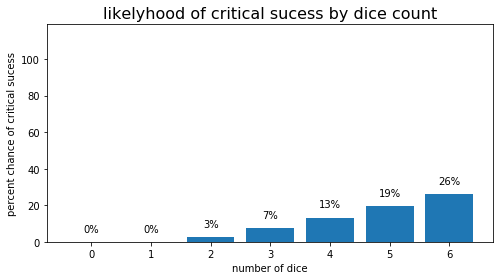

In [17]:
plot_scenario_chance(result_ratio_arrays, 7, "critical sucess", [3])

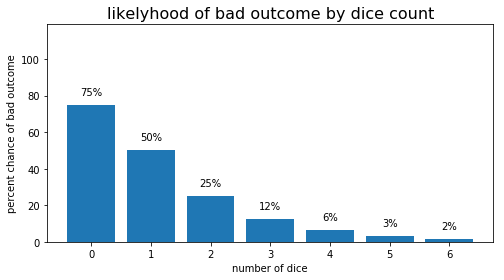

In [18]:
plot_scenario_chance(result_ratio_arrays, 7, "bad outcome", [0])